# Sentiment Analysis with Vader and IBM Watson Tone Analyzer

## Imports

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# ran this to install
# nltk.download('vader_lexicon')


# to install textblob on windows, search and open "Anaconda Prompt"
# run the following command within the anaconda prompt:
# conda install -c conda-forge textblob


## Create dictionaries from JSON File

In [67]:
coronavirus_tweets     = []
non_coronavirus_tweets = []


with open('coronavirus_tweets_with_tone.json', encoding="utf8") as f:
  coronavirus_tweets = json.load(f)

with open('non_coronavirus_tweets_with_tone.json', encoding="utf8") as f:
  non_coronavirus_tweets = json.load(f)


print(f'coronavirus tweets count: {len(coronavirus_tweets)}')
print(f'coronavirus tweets count: {len(non_coronavirus_tweets)}')

coronavirus tweets count: 200
coronavirus tweets count: 200


## Dataframe Setup
Setup the dataframe with the imported json of tweets.  Includes the following columns:
* **id_str**: the tweet's id on twitter
*  **created_at**: timestamp
* **text**: the tweet text
* **anger**: IBM Watson Ton Analyzer score for anger,  (placeholder value 0.0 if score was below .5)
* **analytical**: IBM Watson Ton Analyzer score for analytical (placeholder value 0.0 if score was below .5)
* **confident**: IBM Watson Ton Analyzer score for confident (placeholder value 0.0 if score was below .5)
* **fear**: IBM Watson Ton Analyzer score for fear (placeholder value 0.0 if score was below .5)
* **joy**: IBM Watson Ton Analyzer score for joy (placeholder value 0.0 if score was below .5)
* **sadness**: IBM Watson Ton Analyzer score for sadness (placeholder value 0.0 if score was below .5)
* **tentative**: IBM Watson Ton Analyzer score for tentative (placeholder value 0.0 if score was below .5)
* **vader_polarity**: Ranges from -1 - 1, where -1 is negative and 1 is positive


In [68]:
sid        = SentimentIntensityAnalyzer()
vader_sent = lambda x: sid.polarity_scores(x)['compound']

pd.set_option('max_colwidth', 300)
coronavirus_tweets_df     = pd.DataFrame.from_dict(coronavirus_tweets)
non_coronavirus_tweets_df = pd.DataFrame.from_dict(non_coronavirus_tweets)

coronavirus_tweets_df['vader_polarity'] = coronavirus_tweets_df['text'].apply(vader_sent)
non_coronavirus_tweets_df['vader_polarity'] = non_coronavirus_tweets_df['text'].apply(vader_sent)

## Scatterplots - Vader And IBM Watson Tone Analyzer

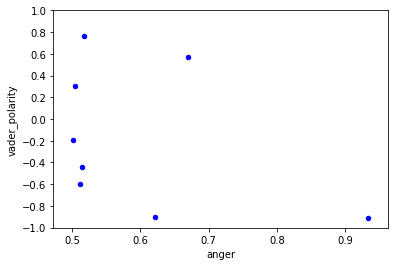

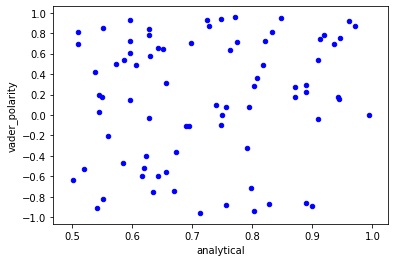

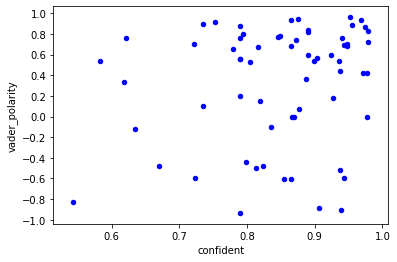

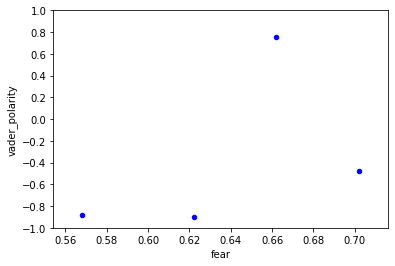

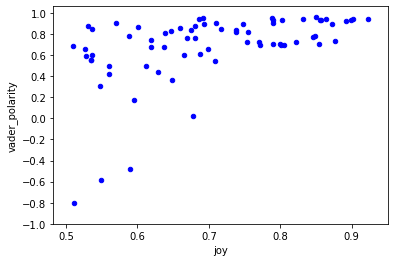

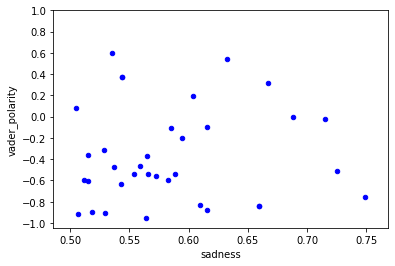

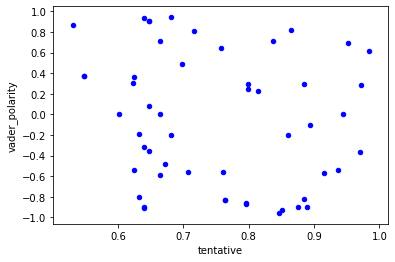

In [69]:
# coronavirus related

# anger
anger_df = coronavirus_tweets_df.copy()
anger_df = anger_df[anger_df.anger != 0.0]

# analytical
analytical_df = coronavirus_tweets_df.copy()
analytical_df = analytical_df[analytical_df.analytical != 0.0]

# confident
confident_df = coronavirus_tweets_df.copy()
confident_df = confident_df[confident_df.confident != 0.0]

# fear
fear_df = coronavirus_tweets_df.copy()
fear_df = fear_df[fear_df.fear != 0.0]

# joy
joy_df = coronavirus_tweets_df.copy()
joy_df = joy_df[joy_df.joy != 0.0]

# sadness
sadness_df = coronavirus_tweets_df.copy()
sadness_df = sadness_df[sadness_df.sadness != 0.0]

# tentative
tentative_df = coronavirus_tweets_df.copy()
tentative_df = tentative_df[tentative_df.tentative != 0.0]

anger_df.plot(kind='scatter',x='anger',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

analytical_df.plot(kind='scatter',x='analytical',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

confident_df.plot(kind='scatter',x='confident',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

fear_df.plot(kind='scatter',x='fear',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

joy_df.plot(kind='scatter',x='joy',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

sadness_df.plot(kind='scatter',x='sadness',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

tentative_df.plot(kind='scatter',x='tentative',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

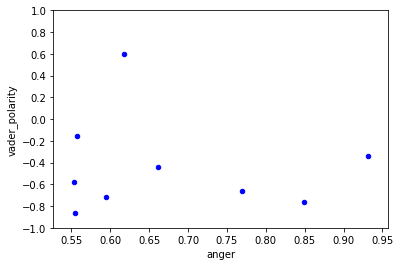

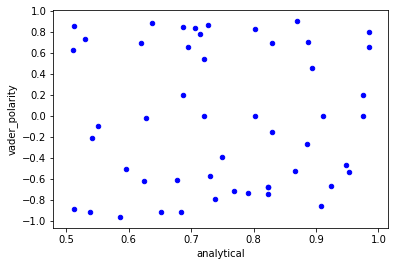

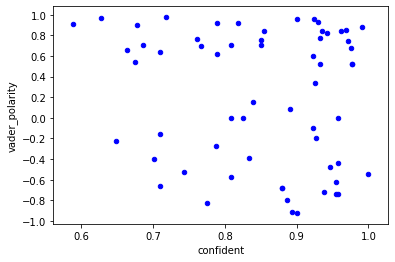

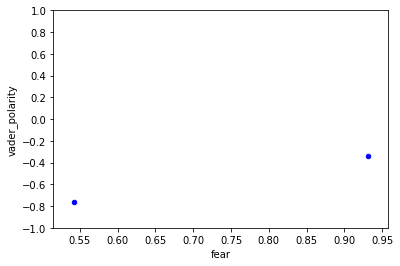

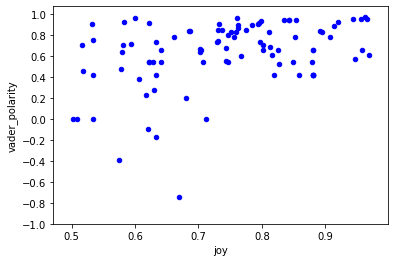

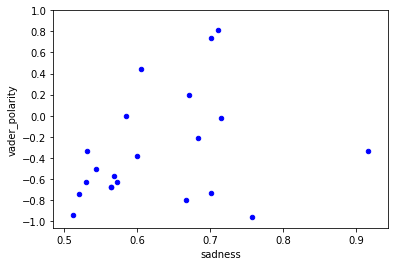

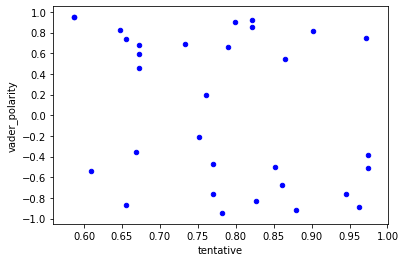

In [70]:
# Non-Coronavirus related tweets

# anger
anger_df = non_coronavirus_tweets_df.copy()
anger_df = anger_df[anger_df.anger != 0.0]

# analytical
analytical_df = non_coronavirus_tweets_df.copy()
analytical_df = analytical_df[analytical_df.analytical != 0.0]

# confident
confident_df = non_coronavirus_tweets_df.copy()
confident_df = confident_df[confident_df.confident != 0.0]

# fear
fear_df = non_coronavirus_tweets_df.copy()
fear_df = fear_df[fear_df.fear != 0.0]

# joy
joy_df = non_coronavirus_tweets_df.copy()
joy_df = joy_df[joy_df.joy != 0.0]

# sadness
sadness_df = non_coronavirus_tweets_df.copy()
sadness_df = sadness_df[sadness_df.sadness != 0.0]

# tentative
tentative_df = non_coronavirus_tweets_df.copy()
tentative_df = tentative_df[tentative_df.tentative != 0.0]

anger_df.plot(kind='scatter',x='anger',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

analytical_df.plot(kind='scatter',x='analytical',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

confident_df.plot(kind='scatter',x='confident',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

fear_df.plot(kind='scatter',x='fear',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

joy_df.plot(kind='scatter',x='joy',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

sadness_df.plot(kind='scatter',x='sadness',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

tentative_df.plot(kind='scatter',x='tentative',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()